In [1]:
# import libraries
import keras
import numpy as np
from utils.preprocess import *
from utils.demonstration import plot_filters
from config import *

In [2]:
# load model
target_model = "unipen_no_cap_model" if no_cap else "unipen_model"
model = keras.models.load_model(f"data/{target_model}.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 24)        408       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 24)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21600)             0         
                                                                 
 dense (Dense)               (None, 96)                2073696   
                                                                 
Total params: 2074104 (7.91 MB)
Trainable params: 2074104 (7.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        print(layer.name)
        print("Weights:", layer.get_weights()[0].shape)
        print(layer.get_weights()[0].min(), layer.get_weights()[0].max())
        print("Bias:", layer.get_weights()[1].shape)
        print(layer.get_weights()[1].min(), layer.get_weights()[1].max())

conv2d
Weights: (4, 4, 1, 24)
-0.3507328 0.22282106
Bias: (24,)
-0.1861415 0.06846717
dense
Weights: (21600, 96)
-1.712725 0.8864909
Bias: (96,)
-0.5301698 0.44627044


[[-0.04162941 -0.05586838 -0.05476163 -0.18214165]
 [-0.34189245 -0.17006432 -0.18979727 -0.07086491]
 [ 0.21620788 -0.14188603 -0.12169139 -0.03684573]
 [-0.29117137 -0.01746203 -0.02272399 -0.18160932]]


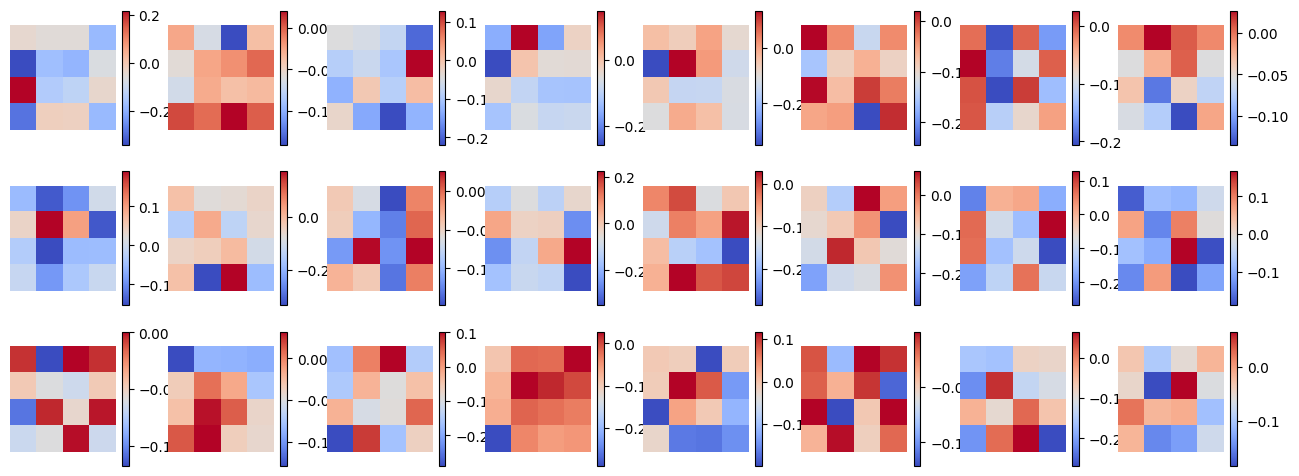

In [5]:
weights = model.layers[0].get_weights()
filters: np.array = weights[0]
print(filters[:, :, 0, 0])
plot_filters(filters, (4, 8))